## Importing Libraries

Importing needed Libraries.

In [1]:
import lightkurve as lk
import astropy as astro
import numpy as np
import matplotlib.pyplot as plt

/home/noah/miniconda3/envs/MPhys/lib/python3.14/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


## Fetching Lightcurve

Fetch lightcurve from TIC and download it.

In [2]:
search_result = lk.search_lightcurve('TIC 91961', author='TESS-SPOC') # Can specify author, use author='TESS-SPOC' 
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,TESS-SPOC,1800,91961,0.0


In [4]:
lc = search_result[-1].download(download_dir='../Data')
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1596.8081122866176,———,———,5.5616656e-03,17728,2040.86860,278.79071,1.7055040e+03,3.5449061e+00,1.0253632e+04,1.8036464e+00,———,———,11000000000000,———,———,———,———,2040.86860,1.3996682e-03,278.79071,1.4213599e-03,1.8676510e-02,1.0387553e-01
1596.82894597757,———,———,5.5620321e-03,17729,2040.86590,278.79390,1.7077418e+03,3.5865903e+00,1.0533679e+04,1.8269517e+00,———,———,11000000000000,———,———,———,———,2040.86590,1.4142954e-03,278.79390,1.4357311e-03,1.9240310e-02,1.0439306e-01
1596.8497796694535,———,———,5.5623995e-03,17730,2040.86352,278.79757,1.7095388e+03,3.6173561e+00,1.0737235e+04,1.8439230e+00,———,———,11000000000000,———,———,———,———,2040.86352,1.4248976e-03,278.79757,1.4461258e-03,2.0056175e-02,1.0422478e-01
1596.870613362269,———,———,5.5627679e-03,17731,2040.86732,278.80247,1.7163218e+03,3.6391625e+00,1.0882849e+04,1.8556306e+00,———,———,11000000000000,———,———,———,———,2040.86732,1.4281666e-03,278.80247,1.4482549e-03,2.0882683e-02,1.0399821e-01
1596.891447055549,———,———,5.5631367e-03,17732,2040.86640,278.80540,1.7178920e+03,3.6589236e+00,1.1017113e+04,1.8672314e+00,———,———,11000000000000,———,———,———,———,2040.86640,1.4341450e-03,278.80540,1.4545708e-03,2.2502024e-02,1.0262079e-01
1596.9122807502265,———,———,5.5635069e-03,17733,2040.86691,278.81328,1.7214578e+03,3.6822784e+00,1.1175105e+04,1.8802205e+00,———,———,11000000000000,———,———,———,———,2040.86691,1.4403994e-03,278.81328,1.4602067e-03,2.5400458e-02,1.0368430e-01
1596.9331144453704,———,———,5.5638775e-03,17734,2040.86861,278.81342,1.7293184e+03,3.7059066e+00,1.1329937e+04,1.8926359e+00,———,———,11000000000000,———,———,———,———,2040.86861,1.4429153e-03,278.81342,1.4628214e-03,2.5820248e-02,1.0261293e-01
1596.953948142377,———,———,5.5642501e-03,17735,2040.86894,278.81555,1.7246064e+03,3.7319906e+00,1.1520570e+04,1.9075041e+00,———,———,11000000000000,———,———,———,———,2040.86894,1.4572147e-03,278.81555,1.4763657e-03,2.8288705e-02,1.0386625e-01


## Unchanged Lightcurve

Plot as the data is.

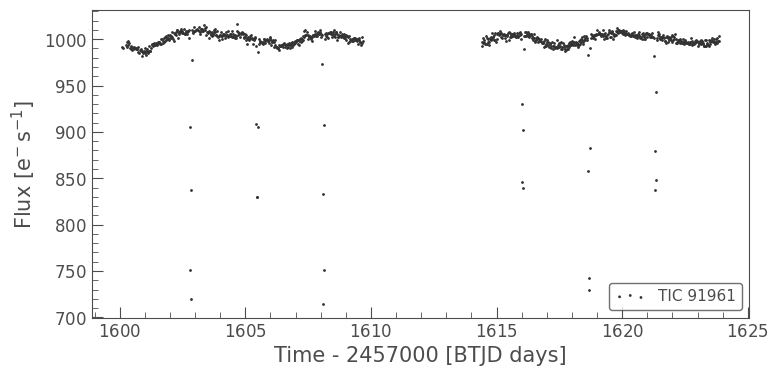

In [177]:
lc.scatter()
plt.show()

## Truncate Lightcurve

Find first continuous portion for easier visual analysis. If there isn't any gaps it will just plot the entire thing again.

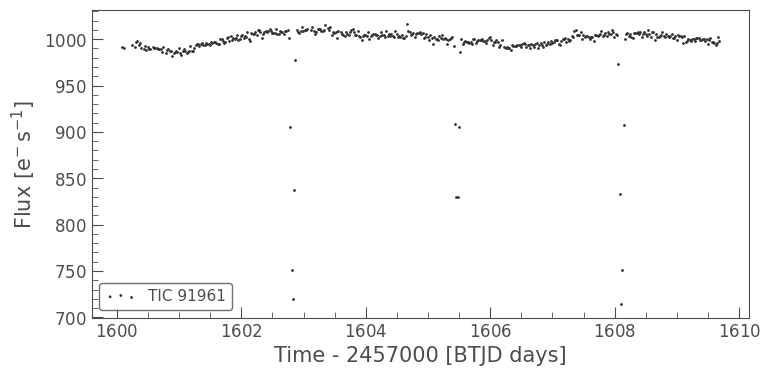

In [178]:
# Find first unsegmentated piece
flux = np.array(lc['flux'].value.tolist())
no_flux = np.argwhere(np.isnan(flux)).flatten()
for i, idx in enumerate(no_flux):
    if i != idx: break
    
if no_flux.size > 0: trun_lc = lc.truncate(lc.time.value[no_flux[i-1]], lc.time.value[no_flux[i]], column='time')
else: trun_lc = lc
trun_lc.scatter()
plt.show()

## Normalize Lightcurve

Again, just manipulating the fluxes for the sake of making things look better for plotting.

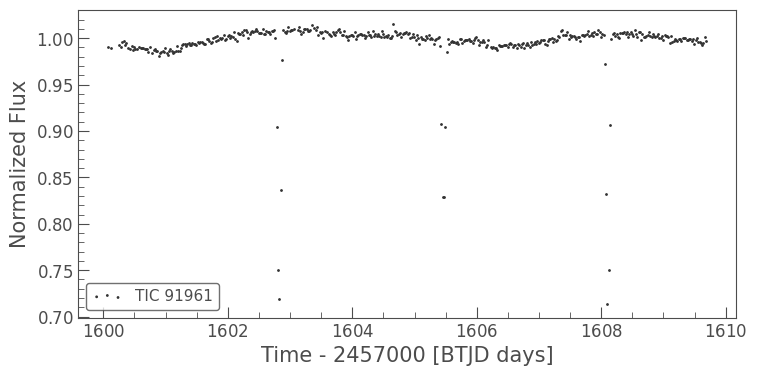

In [179]:
flat_lc = trun_lc.normalize()
flat_lc.scatter()
plt.show()

## Periodogram

Calculate the period by using box least squares algorithm and selecting the period with the maximum BLS power.
This could be an issue as period aliases do exist.

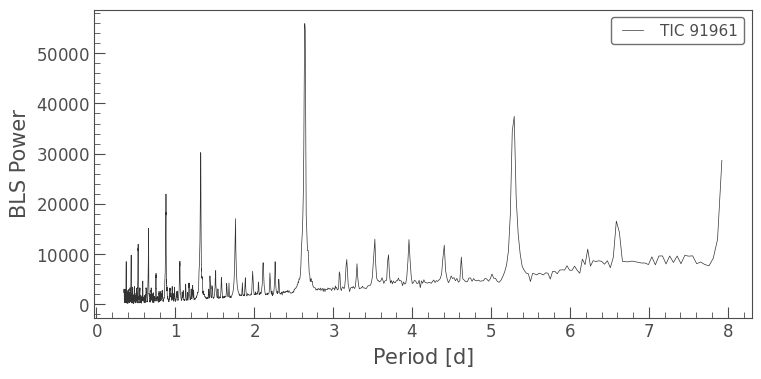

5.279603035513411 d


In [ ]:
pdgram = lc.normalize().to_periodogram(method='bls')
ax = pdgram.plot(view='period')
plt.show()
period = pdgram.period_at_max_power * 2 # This might be a problem
print(period)

## Phase Diagram

Find an epoch and then use the period determination to phase lightcurves.

1608.0999577961175


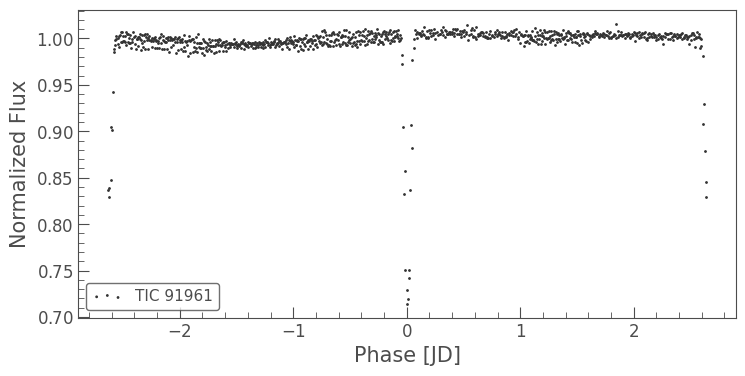

In [181]:
t0 = lc.time[np.argmin(lc.flux)]
print(t0)
phase_curv = lc.fold(period=period, epoch_time=t0).normalize()
phase_curv.scatter()
plt.show()